RMSE : 20.487988968355808


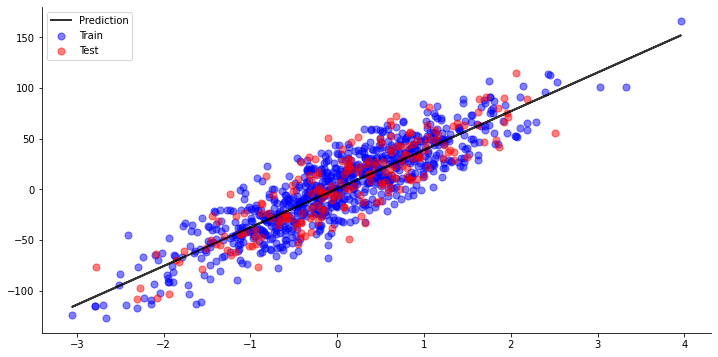

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=1e-3,n_iters=1000):
        self.lr=learning_rate
        self.n_iters=n_iters
        self.weights=None
        self.bias=None

    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias=0
    
    def fit(self,X,y):
        self.n_samples,self.n_features = X.shape
        self._init_params()
        
        for _ in range(self.n_iters):
            y_pred = self._get_prediction(X)
            dw, db = self._get_gradients(X,y,y_pred)
            self._update_params(dw, db)
    
    def _get_prediction(self,X):
        return np.dot(X,self.weights)+self.bias
    
    def _get_gradients(self,X,y,y_pred):
        error=y_pred-y
        dw = (1/self.n_samples)*np.dot(X.T,error)
        db = (1/self.n_samples)*np.sum(error)
        return dw,db
    
    def _update_params(self,dw,db):
        self.weights -=self.lr*dw
        self.bias -= self.lr*db
        
    def predict(self, X):
        y_pred= self._get_prediction(X)
        return y_pred
 
def rmse(y_true,y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2))

X, y=datasets.make_regression(
    n_samples=1000,n_features=1,noise=20,random_state=1
)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

linreg = LinearRegression(learning_rate=0.01,n_iters=1000)
linreg.fit(X_train,y_train)

predictions =linreg.predict(X_test)
print(f"RMSE : {rmse(y_test, predictions)}")

fig, ax =plt.subplots(1,1,figsize = (12,6))

ax.scatter(X_train,y_train,c='blue',s=50,alpha=0.5,label='Train')
ax.scatter(X_test,y_test,c='red',s=50,alpha=0.5,label='Test')
ax.plot(X,linreg.predict(X),c='black',lw=2,alpha=0.8,label='Prediction')

for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.legend()
plt.show()
